**[LO 1, LO 2, LO 3 – 10 Points]** Mengumpulkan data review games dengan tema yang anda suka dengan
cara scrapping sebanyak 1000 data dengan berbagai nilai rating. Anda juga memutuskan untuk
mengumpulkan data review dalam bahasa Inggris.

# Gather Data

Mengambil data pada google play dengan menggunakan library google_play_scraper


In [1]:
#import os
#!git clone https://github.com/IceKhoffi/ClashRoyale-Scrape-And-Modelling
#os.chdir('ClashRoyale-Scrape-And-Modelling')
#!pip install google_play_scraper

Cloning into 'ClashRoyale-Scrape-And-Modelling'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (9/9), done.
Resolving deltas: 100% (1/1), done.


In [5]:
# from gplays import scrape_ps_reviews
# try:
#     clash_royal_data = scrape_ps_reviews(
#         app_id = 'com.supercell.clashroyale',
#         total_reviews = 1000,
#         lang = 'en',
#         country = 'us',
#         delay_seconds = 10
#     )

#     if clash_royal_data is not None and not clash_royal_data.empty:
#         clash_royal_data.to_csv('clash_royal_data_new.csv', index=False)
#         print("Data tersimpan")
#     else:
#         print("Scraping Gagal")

# except Exception as e:
#     print(f"Error: {e}")

Scraping Started!
200 has been collected!
400 has been collected!
600 has been collected!
800 has been collected!
1000 has been collected!
Data tersimpan


# Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [2]:
data = pd.read_csv('ClashRoyale-Scrape-And-Modelling/clash_royal_data.csv')
data.head()

,user_name,rating,date,review
0,Christian Monserrate,4,2025-10-10 07:47:17,"It's a great game overall, my biggest complain..."
1,Aaron Schneider,4,2025-11-04 04:22:35,I've played this game for about 5 months now a...
2,Radu Codreanu,3,2025-10-16 23:49:47,Honestly I think the game was in a good spot a...
3,Eluen Rodriguez V.,4,2025-08-19 12:54:08,I really like most of the changes that the gam...
4,Preston,4,2025-08-14 09:29:41,"I won't lie, Clash is a great is an amazing ga..."


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_name  1000 non-null   object
 1   rating     1000 non-null   int64 
 2   date       1000 non-null   object
 3   review     1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [4]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=27)

# Exploratory Data Analysis

**[LO 1, LO 2, LO 3 – 10 Points]** Anda ingin mengenal data yang anda scrapping, maka anda melakukan
exploratory terhadap data untuk melihat kata-kata yang dominan disetiap rating dan memeriksa apakah
kata-kata yang tidak sesuai dengan standar bahasa punya frekuensi yang besar

Check for Label Distribution

Sebelum melalui beberapa tahap preprocessing melihat distribusi label pada data supaya kita dapat mengambil langkah selanjutnya dalam mengatasi imbalance dataset

In [41]:
train['rating'].value_counts()

,count
rating,
1,496
2,101
3,77
4,67
5,59


Analyze text length

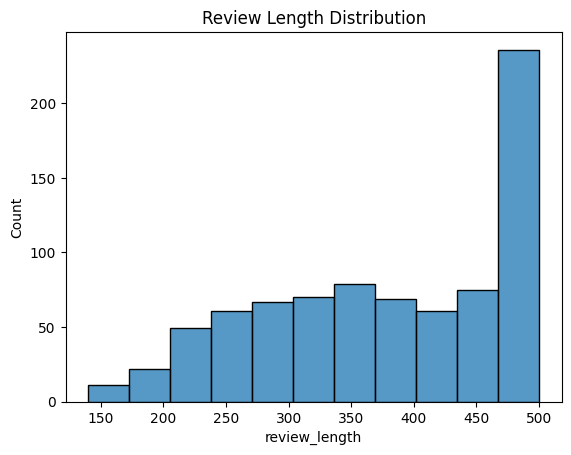

In [6]:
train['review_length'] = train['review'].apply(len)
sns.histplot(train['review_length'])
plt.title('Review Length Distribution')
plt.show()

Histogram diatas menunjukkan distribusi karakter dari review. dimana distribusi mulai dari 140 hingga 500 karakter, aritinya review tersebut konsisten dan tidak ada outliers yang perlu di filter.

Tokenize each reviews

In [7]:
train['tokens'] = train['review'].str.lower().str.split()
train.head()

,user_name,rating,date,review,review_length,tokens
172,Alek Madzharov,1,2025-09-11 20:11:42,The game is no longer fun and it can never ret...,484,"[the, game, is, no, longer, fun, and, it, can,..."
588,Chris Bachar,1,2025-09-22 12:26:25,1 star for being another cash grab game. eithe...,369,"[1, star, for, being, another, cash, grab, gam..."
756,Edo Marko,1,2025-10-01 12:15:26,"A very exciting game, but unfortunately it is ...",490,"[a, very, exciting, game,, but, unfortunately,..."
649,Luke Smith,1,2025-09-23 19:02:25,"horrible game. I mean, people currently are on...",472,"[horrible, game., i, mean,, people, currently,..."
287,Rhodes Baillie,2,2025-09-28 18:30:06,The actual gameplay is decent but is extremely...,450,"[the, actual, gameplay, is, decent, but, is, e..."


Analyzing word frequency

In [8]:
all_words = [word for tokens in train['tokens'] for word in tokens]
word_freq = Counter(all_words)
word_freq.most_common(10)

[('the', 2352),
 ('to', 1998),
 ('and', 1553),
 ('game', 1222),
 ('a', 1196),
 ('i', 1194),
 ('is', 1049),
 ('you', 1006),
 ('it', 839),
 ('of', 782)]

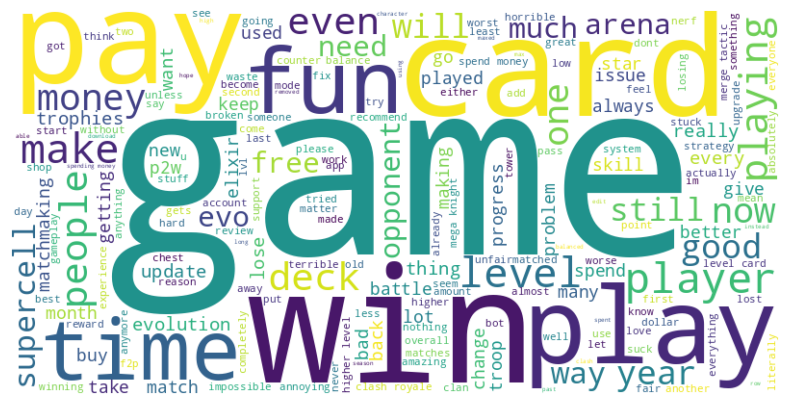

In [9]:
from wordcloud import WordCloud
wc = WordCloud(width=800, height=400, background_color='white').generate(" ".join(all_words))
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Analyze each words that dominant on each rating

In [10]:
for rating in train['rating'].unique():
    rating_tokens = [word for tokens in train[train['rating'] == rating]['tokens'] for word in tokens]
    rating_word_freq = Counter(rating_tokens)
    print(f"Most common words for rating {rating}:")
    print(rating_word_freq.most_common(10))
    print("-" * 5)

Most common words for rating 1:
[('the', 1452), ('to', 1317), ('and', 976), ('game', 800), ('a', 732), ('i', 702), ('you', 686), ('is', 645), ('this', 536), ('it', 493)]
-----
Most common words for rating 2:
[('the', 299), ('to', 255), ('and', 175), ('a', 149), ('i', 146), ('game', 133), ('is', 114), ('you', 114), ('it', 113), ('of', 98)]
-----
Most common words for rating 5:
[('the', 179), ('and', 145), ('i', 111), ('to', 100), ('game', 90), ('a', 88), ('is', 86), ('of', 76), ('it', 75), ('you', 64)]
-----
Most common words for rating 3:
[('the', 238), ('to', 180), ('and', 148), ('i', 137), ('a', 127), ('is', 105), ('game', 100), ('it', 86), ('you', 77), ('but', 74)]
-----
Most common words for rating 4:
[('the', 184), ('to', 146), ('and', 109), ('a', 100), ('game', 99), ('is', 99), ('i', 98), ('it', 72), ('you', 65), ('but', 61)]
-----


Berdasarkan hasil analisis frequensi kata diatas di dapatkan bahwa ketika data text belum di proses kata yang paling dominan itu merupakan kata stopwords seperti "the", "to", "and", "is", kata-kata ini akan dihilangkan agar teks lebih informative ketika diberikan ke model.

# Text Preprocessing

**[LO 1, LO 2, LO 3 – 15 Points]** Anda melihat bahwa data ini tidak bisa langsung digunakan dalam
membangun model prediksi rating, maka anda melakukan preprocessing data hingga mendapatkan
bentuk token paling efektif yang sesuai kaidah tata bahasa dan sebisa mungkin makna kata tersebut tidak
berubah apalagi kelas katanya.

In [11]:
prep_train = train[['rating', 'review']].copy()

In [12]:
prep_train.head()

,rating,review
172,1,The game is no longer fun and it can never ret...
588,1,1 star for being another cash grab game. eithe...
756,1,"A very exciting game, but unfortunately it is ..."
649,1,"horrible game. I mean, people currently are on..."
287,2,The actual gameplay is decent but is extremely...


Remove Non-Alphanumeric

Menggunakan Regular Expression (RE) untuk menghilangkan tanda baca, angka, special karakter. serta normalisasi setiap kalimat ke huruf kecil untuk konsistensi.

In [13]:
import re
prep_train['review'] = prep_train['review'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x).lower())
prep_train.head()

,rating,review
172,1,the game is no longer fun and it can never ret...
588,1,star for being another cash grab game either ...
756,1,a very exciting game but unfortunately it is v...
649,1,horrible game i mean people currently are only...
287,2,the actual gameplay is decent but is extremely...


Remove Stopwords & Lemmatize words

Kita ingin menghilangkan English stopwords seperti (the, a, is) menggunakan library seperti NLTK "Stopwords ini perlu dihilangkan karena dapat menambahkan noise dan biasanya tidak memiliki sentiment"

Selain itu Lemmatize words berfungsi agar setiap kata di reduce ke dalam bentuk base katanya sebagai contoh playing menjadi play "Jadi Lemmatize berfungsi agar dimensi ketika melakukan tokenisasi lebih kecil dan model dapat menggeneralize lebih baik"

In [14]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords

nltk.download('wordnet')
nltk.download('stopwords')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
prep_train['clean_review'] = prep_train['review'].apply(lambda x: ' '.join([lemmatizer.lemmatize(w) for w in x.split() if w not in stop_words]))
prep_train.head()

,rating,review,clean_review
172,1,the game is no longer fun and it can never ret...,game longer fun never return year ago change u...
588,1,star for being another cash grab game either ...,star another cash grab game either opponent pl...
756,1,a very exciting game but unfortunately it is v...,exciting game unfortunately unfriendly fp play...
649,1,horrible game i mean people currently are only...,horrible game mean people currently playing po...
287,2,the actual gameplay is decent but is extremely...,actual gameplay decent extremely unfair purpos...


# Text Representation

**[LO 1, LO 2, LO 3 – 10 Points]** Anda memutuskan akan menggunakan machine learning unutk model
prediksi, namun sebelum itu anda perlu merepresentasikan data teks ini kedalam bentuk vektor yang
dapat diterima oleh machine learning sebagai input, maka anda menerapkan 2 bentuk metode text
representation yaitu, metode yang nilai vectornya merepresentasikan seberapa penting kata tersebut
dalam suatu data sample, dan metode yang vectornya direpresentasikan oleh kata disekitarnya yang
ditraining dengan model ANN dengan input kata dan target kata yang ada disekitarnya. Anda akan
mencoba kedua metode text representation ini sebagai input yang kemudian akan dibandingkan
performance prediksinya.

## TF-IDF

TF-IDF dipilih karena kata diberikan bobot berdasarkan frekuensi yang relatif, dan ini dapat mempengaruhi kata umum

**metode yang nilai vectornya merepresentasikan seberapa penting kata tersebut dalam suatu data sample**

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(prep_train['clean_review'])

## Word2Vec

Text representasi kedua yang diambil **Word2Vec** karena representasi kata dilakukan dalam ruang vektor berdimensi rendah juga menambahkan konsep. Jadinya makna semantik dari kata dapat ditangkap.

**metode yang vectornya direpresentasikan oleh kata disekitarnya yang ditraining dengan model ANN dengan input kata dan target kata yang ada disekitarnya**

In [17]:
#!pip install gensim

In [18]:
from gensim.models import Word2Vec

tokens = [t.split() for t in prep_train['clean_review']]
w2v = Word2Vec(sentences = tokens, vector_size = 100, window = 5, min_count = 2, workers = 4)

def vectorize(tokens):
  vec = np.zeros(100)
  count = 0
  for w in tokens:
    if w in w2v.wv:
      vec += w2v.wv[w]
      count += 1
  return vec / count if count > 0 else vec

X_train_w2v = np.array([vectorize(t.split()) for t in prep_train['clean_review']])

pemlihan parameter seperti
- v_size = 100 agar computational cost dan semantic menjadi balance
- window = 5 agar dapat mendapatkan context pada tiap kata
- min_count = 2 menghilangkan kalimat noise yang tidak ada di stopwords
- workers = 4 mempercepat proses w2v

In [19]:
def preprocess_data(data, lemmatizer, stop_words):
    prep_data = data[['rating', 'review']].copy()
    prep_data['review'] = prep_data['review'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x).lower())
    prep_data['clean_review'] = prep_data['review'].apply(lambda x: ' '.join([lemmatizer.lemmatize(w) for w in x.split() if w not in stop_words]))
    return prep_data

In [20]:
prep_test = preprocess_data(test, lemmatizer, stop_words)

In [21]:
prep_test.head()

,rating,review,clean_review
754,4,great game but needs fairer trophy losses cl...,great game need fairer trophy loss clash royal...
768,1,i had two accounts played and tried to log bac...,two account played tried log back one account ...
23,1,for those of you who are experiencing difficul...,experiencing difficulty logging like app crash...
47,1,been playing for over years initially this is...,playing year initially good realtime strategy ...
453,1,this game is very addicting at first however w...,game addicting first however kept playing adva...


In [22]:
X_test_tfidf = tfidf_vectorizer.transform(prep_test['clean_review'])
X_test_w2v = np.array([vectorize(t.split()) for t in prep_test['clean_review']])

# ML Modelling

**[LO 1, LO 2, LO 3 – 15 Points]** Setelah text represntation selesai, anda melakukan pemodelan prediksi
dengan menggunakan 2 metode Machine Lerning yang anda pilih sendiri; tentu saja anda juga perlu
melakukan tuning hyperparameter minimal 2 hyperparameter untuk masing-masing algoritma machine
learning.

In [23]:
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [24]:
def evaluate_model(y_true, y_pred):
  rep = classification_report(y_true, y_pred, output_dict = True)
  met = {
      'accuracy': rep['accuracy'],
      'macro precision': rep['macro avg']['precision'],
      'macro recall': rep['macro avg']['recall'],
      'macro f1-score': rep['macro avg']['f1-score'],
      'weighted f1-score': rep['weighted avg']['f1-score']
  }

  for n, v in met.items():
    print(f"{n}: {v:.2f}")

  return None

Untuk mengevaluasi model dipilih macro f1-score untuk menilai sebuah model pada dataset imbalance, dan weighted f1-score untuk menjadi patokan score untuk setiap model.

## Logistic Regression (LR)

Pemilihan model ini merupakan sebagai baseline text classification juga lebih mudah diinterpretasikan.

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [26]:
param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

Pada Logistic Regression Model, ada 3 parameter yang akan kita ubah-ubah penjelasannya sebagai berikut:
1. Variabel C, dimana regularisasi lebih lemah (model lebih kompleks), ketika nilai C lebih tinggi ini dapat membantu model menangkap variasi kata yang penting tanpa terlalu menekan koefisien
2. Penalty, digunakan untuk feature selection, karena data teks terkadang memiliki dimensi yang tinggi dan banyak fitur yang tidak relevan
3. Solver liblinear, karena dataset kita kecil (1000 data) jadinya dapat lebih stabil pada data teks

TF-IDF + Logistic Regression

In [27]:
grid_lr_tfidf = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='f1_weighted')
grid_lr_tfidf.fit(X_train_tfidf, prep_train['rating'])

pred = grid_lr_tfidf.predict(X_test_tfidf)
evaluate_model(prep_test['rating'], pred)

accuracy: 0.58
macro precision: 0.29
macro recall: 0.28
macro f1-score: 0.28
weighted f1-score: 0.53


Pada semua model GridSearchCV scoring dilakukan dengan metode f1_weighted ini digunakan karena data kita imbalance jadi lebih adil karena setiap kelas akan dipertimbangkan proporsinya selama training

Word2Vec + Logistic Regression

In [28]:
grid_lr_w2v = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='f1_weighted')
grid_lr_w2v.fit(X_train_w2v, prep_train['rating'])

pred = grid_lr_w2v.predict(X_test_w2v)
evaluate_model(prep_test['rating'], pred)

accuracy: 0.61
macro precision: 0.12
macro recall: 0.20
macro f1-score: 0.15
weighted f1-score: 0.46


## Support Vector Machine (SVM)

Model SVM dipilih karena lebih tahan terhadap outlier dan imbalance pada data dibandingkan dengan LR

In [29]:
from sklearn.svm import LinearSVC

In [30]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'loss': ['hinge', 'squared_hinge']
}

Pada Support Vector Machine (SVM) ada 2 variabel yang dapat dijadikan hyperparameter sebagai berikut:
1. Variabel C, dimana fungsinya hampir sama dengan LR dimana kita ingin memberikan toleransi kesalahan yang kecil pada model jadi memaksa terjadinya pemisah antar label.
2. Loss, karena ini menentukan seberapa besar penalti yang akan kita berikan kemodel kalau hasil prediksi tidak sesuai atau terlalu dekat dengan decision boundary.

TF-IDF + SVM

In [31]:
grid_svm_tfidf = GridSearchCV(LinearSVC(), param_grid_svm, cv=5, scoring='f1_weighted')
grid_svm_tfidf.fit(X_train_tfidf, prep_train['rating'])

pred = grid_svm_tfidf.predict(X_test_tfidf)
evaluate_model(prep_test['rating'], pred)

accuracy: 0.62
macro precision: 0.47
macro recall: 0.38
macro f1-score: 0.41
weighted f1-score: 0.60


In [32]:
svm_cr = classification_report(prep_test['rating'], pred)

Word2Vec + SVM

In [33]:
grid_svm_w2v = GridSearchCV(LinearSVC(), param_grid_svm, cv=5, scoring='f1_weighted')
grid_svm_w2v.fit(X_train_w2v, prep_train['rating'])

pred = grid_svm_w2v.predict(X_test_w2v)
evaluate_model(prep_test['rating'], pred)

accuracy: 0.61
macro precision: 0.12
macro recall: 0.20
macro f1-score: 0.15
weighted f1-score: 0.46


# Evaluation Summary

**[LO 1, LO 2, LO 3, LO4 – 10 Points]** Untuk mengetahui performa model prediksi yang anda kerjakan,
tentu anda perlu melakukan performance evaluation dan juga menganalisa hasilnya. Anda melakukan
perbandingan performance test data dari model yang dibuat dengan metode text representation yang
berbeda, dan anda membuat summary hasil sebagai berikut:

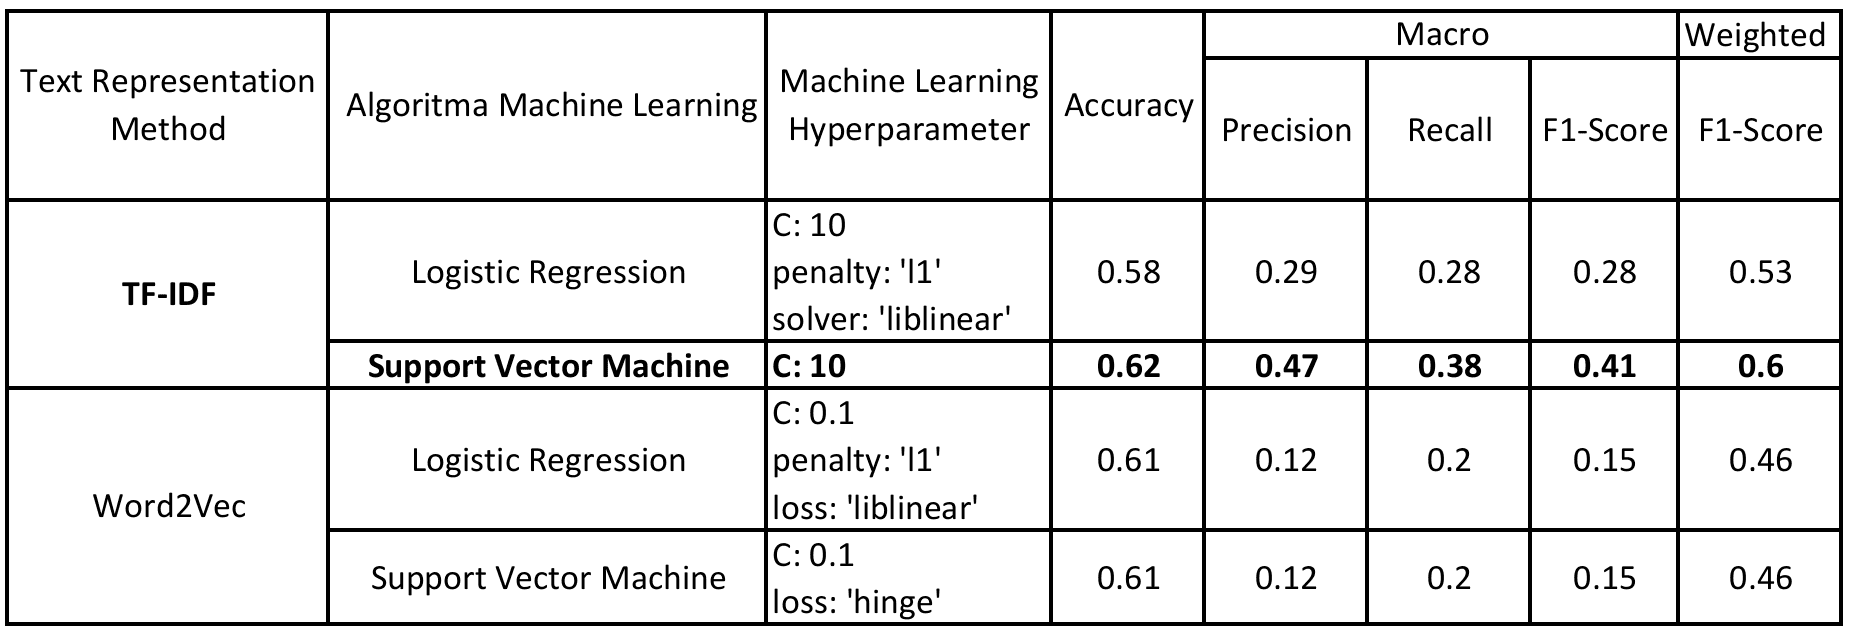

Dari hasil evaluation summary didapatkan bahwa **Metode TF-IDF dengan Support Vector System (C = 10 loss = 'hinge')** mendapatkan performance yang baik dalam semua aspek. Dalam hal ini didapatkan bahwa TF-IDF lebih baik ketika dataset yang cukup kecil dibandingkan dengan Word2Vec. SVM juga lebih baik dibandingkan Logistic Regression karena kita sedang bekerja dengan data yang memiliki dimensional yang cukup besar.

# Dealing with Imbalance data using SMOTE

**[LO 1, LO 2, LO 3, LO 4 – 20 Points]** Anda mendapati ternyata data anda imbalance, sehingga anda
penasaran, apakah jika kondisi imbalance data ini dihandle, akan ada perubahan pada perfomance atau
tidak, sehingga anda melakukan treatment terhadap data imbalance dan melakukan training kembali dan
melakukan evaluasi terhadap model dengan kondisi data baru. Anda membandingkan evaluasi
performancenya dan mendapatkan kesimpulan, model mana yang terbaik.


In [34]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=27)

In [35]:
X_bal_tfidf, y_bal_tfidf = smote.fit_resample(X_train_tfidf, prep_train['rating'])
X_bal_w2v, y_bal_w2v = smote.fit_resample(X_train_w2v, prep_train['rating'])

In [54]:
print(f'Before SMOTE: \n{prep_train['rating'].value_counts()}\n')
print(f'After SMOTE: \n{y_bal_tfidf.value_counts()}')

Before SMOTE: 
rating
1    496
2    101
3     77
4     67
5     59
Name: count, dtype: int64

After SMOTE: 
rating
1    496
2    496
5    496
3    496
4    496
Name: count, dtype: int64


In [36]:
grid_lr_tfidf = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='f1_weighted')
grid_lr_tfidf.fit(X_bal_tfidf, y_bal_tfidf)

pred = grid_lr_tfidf.predict(X_test_tfidf)
evaluate_model(prep_test['rating'], pred)

accuracy: 0.59
macro precision: 0.38
macro recall: 0.34
macro f1-score: 0.35
weighted f1-score: 0.57


In [37]:
grid_lr_w2v = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='f1_weighted')
grid_lr_w2v.fit(X_bal_w2v, y_bal_w2v)

pred = grid_lr_w2v.predict(X_test_w2v)
evaluate_model(prep_test['rating'], pred)

accuracy: 0.25
macro precision: 0.24
macro recall: 0.27
macro f1-score: 0.21
weighted f1-score: 0.29


In [38]:
grid_svm_tfidf = GridSearchCV(LinearSVC(), param_grid_svm, cv=5, scoring='f1_weighted')
grid_svm_tfidf.fit(X_bal_tfidf, y_bal_tfidf)

pred = grid_svm_tfidf.predict(X_test_tfidf)
evaluate_model(prep_test['rating'], pred)

accuracy: 0.61
macro precision: 0.46
macro recall: 0.39
macro f1-score: 0.41
weighted f1-score: 0.59


In [39]:
grid_svm_w2v = GridSearchCV(LinearSVC(), param_grid_svm, cv=5, scoring='f1_weighted')
grid_svm_w2v.fit(X_bal_w2v, y_bal_w2v)

pred = grid_svm_w2v.predict(X_test_w2v)
evaluate_model(prep_test['rating'], pred)

accuracy: 0.20
macro precision: 0.30
macro recall: 0.25
macro f1-score: 0.13
weighted f1-score: 0.24


In [40]:
grid_svm_w2v.best_estimator_

LinearSVC(C=10, loss='hinge')

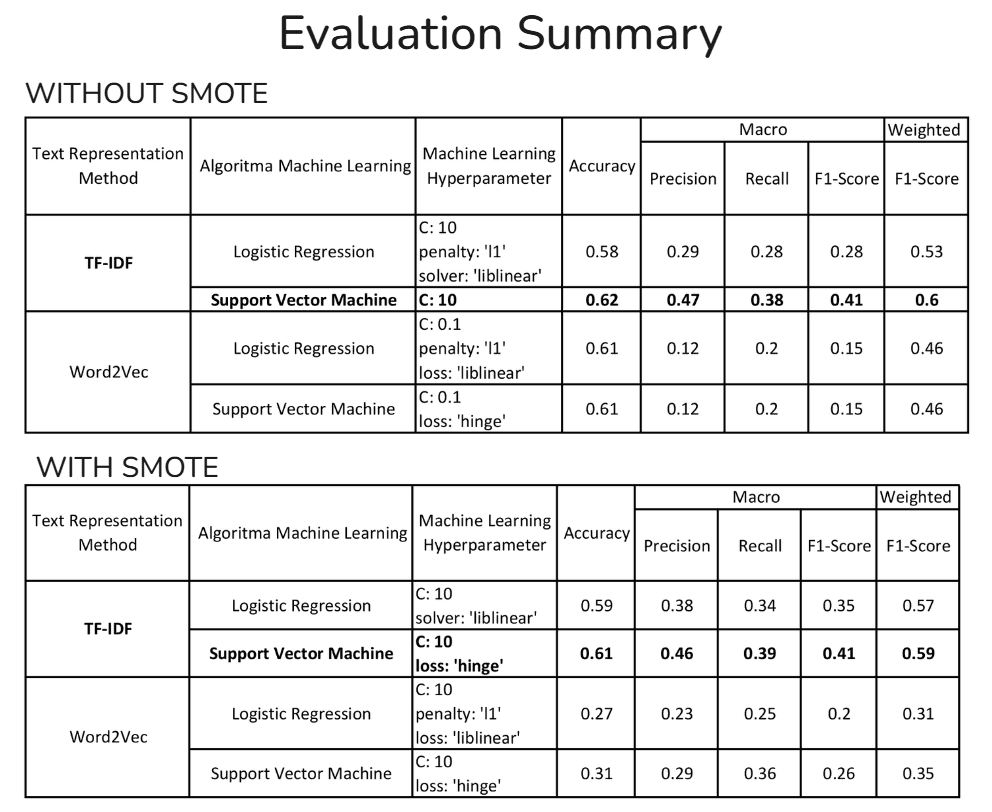

Tanpa SMOTE, model TF-IDF + SVM (C: 10) dapat menghasilkan performa terbaik dengan akurasi 0.62 dan Macro F1 = 0.41, setelah SMOTE diterapkan, performa model menjadi lebih seimbang antar kelas, nilai macro precision dan recall meningkat.

**Model terbaik adalah TF-IDF + SVM** ini dikarenakan Weighted F1 pada model TF-IDF + SVM lebih stabil. Dan pada data dengan SMOTE Word2Vec menajdi kurang efektif karena data sedikit, sehingga TF-IDF lebih cocok untuk kasus ini.



---



---



**[LO 1, LO 2, LO 3, LO 4 – 10 Points]** Untuk setiap proses di atas anda memberikan penjelasan dengan
detail baik pada dokumen Notebook maupun pada Video agar dapat bermanfaat bagi orang lain.

None